In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [22]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
recent = session.query(measurement.date).order_by(measurement.date.desc())
recent = recent[0].date

print(recent)

2017-08-23


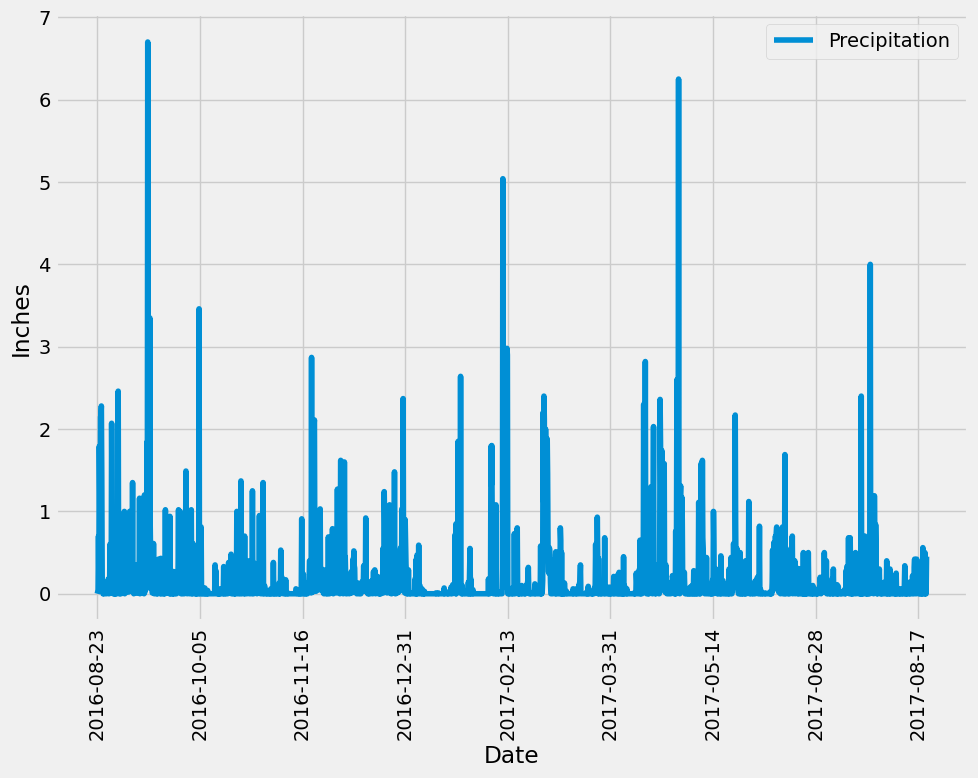

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_lim = "2016-08-23"

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.prcp, measurement.date).filter(measurement.date >= date_lim)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prec_df = pd.DataFrame(precipitation)
prec_df = prec_df.rename(columns = {"prcp" : "Precipitation", "date" : "Date"})

# Sort the dataframe by date
prec_df = prec_df.dropna()
prec_df = prec_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
prec_df.plot(x = "Date", y = "Precipitation", kind = "line", figsize = (10, 8), rot = 90, ylabel = "Inches")
plt.tight_layout()
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(prec_df.describe())

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(station).group_by(station.station).count()
print(num_stations)

9


In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
c_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

for c in c_stations:
    print(c)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = session.query(measurement.tobs).filter(measurement.station == "USC00519281")
active_df = pd.DataFrame(active)

print(active_df["tobs"].min(), active_df["tobs"].max(), active_df["tobs"].mean())

54.0 85.0 71.66378066378067


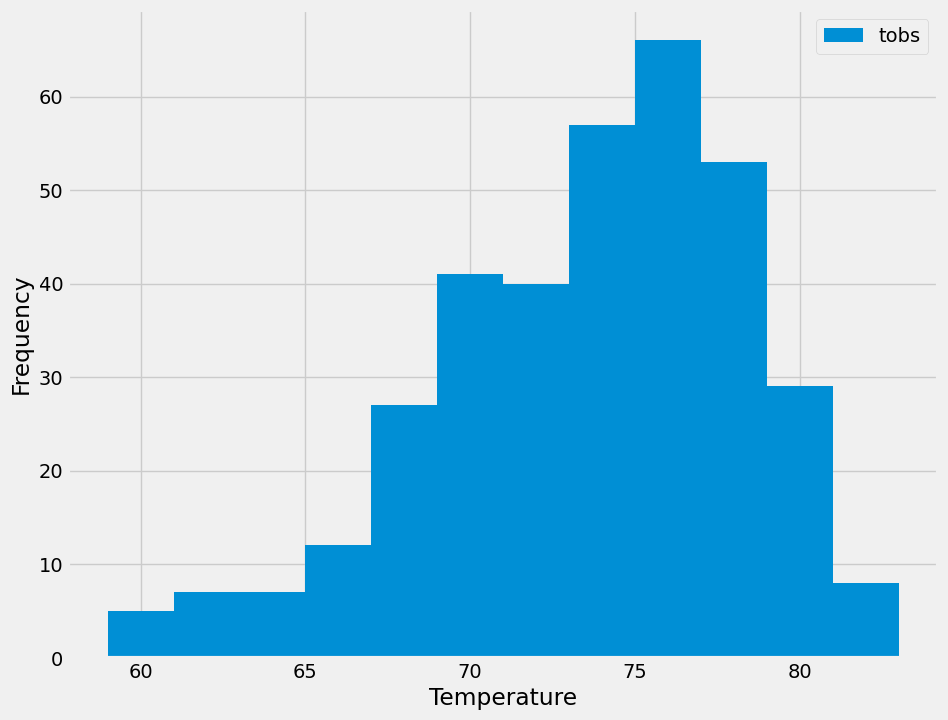

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(measurement.tobs).filter(measurement.date >= date_lim).filter(measurement.station == "USC00519281")

tobs_df = pd.DataFrame(tobs)
tobs_df = tobs_df.dropna()

tobs_df.plot(kind = "hist", bins = 12, figsize = (10, 8), xlabel = "Temperature")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()